In [834]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [835]:
df = pd.read_csv("Mall_Customers.csv")

In [836]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [854]:
dept_count = df.groupby(['Gender']).size()

In [846]:
dept_count

Gender
Female    112
Male       88
dtype: int64

<AxesSubplot:xlabel='Gender'>

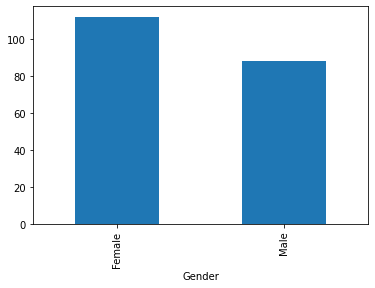

In [863]:
df.value_counts(df.Gender).plot.bar()

In [790]:
df.rename(columns = {'Spending Score (1-100)':'Spending_Score'}, inplace = True)
df.rename(columns = {'Annual Income (k$)':'Annual_Income'}, inplace = True)


In [791]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

df = df.drop(['Gender_Male'],axis=1)

In [792]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [793]:
df.drop('CustomerID',inplace=True,axis = 1)


c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

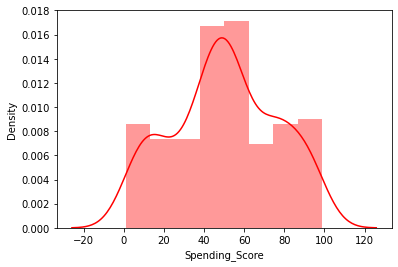

In [794]:
sn.distplot( df['Spending_Score'], color = 'r')


c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

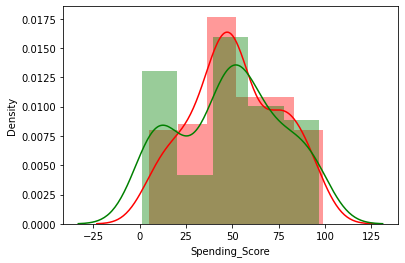

In [795]:
sn.distplot( df[df.Gender_Female == 1]['Spending_Score'], color = 'r')
sn.distplot( df[df.Gender_Female == 0]['Spending_Score'], color = 'g')

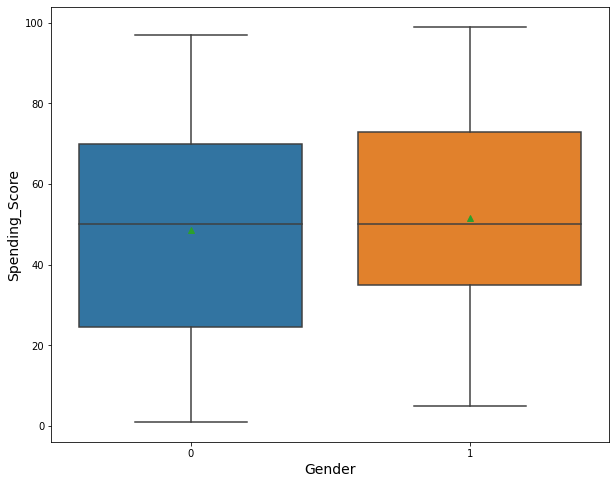

In [796]:
plt.figure(figsize=(10, 8))

sn.boxplot(x='Gender_Female',
            y='Spending_Score',
            data=df,
            showmeans=True)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Spending_Score", fontsize=14)
plt.show()

c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

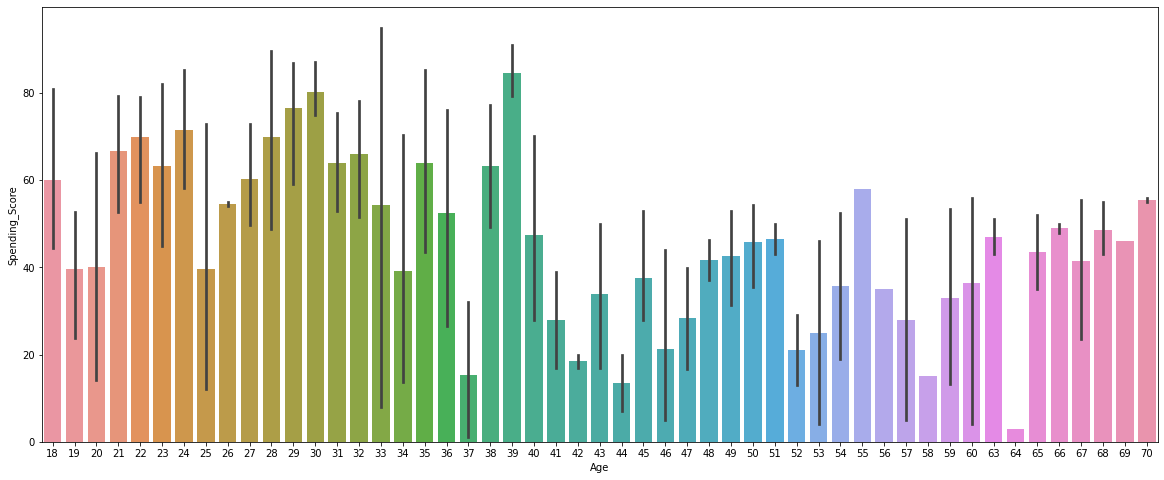

In [797]:
plt.figure(figsize=(20, 8))
sn.barplot( df.Age, df.Spending_Score )

In [798]:
df.Annual_Income

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual_Income, Length: 200, dtype: int64

In [799]:
#How represent the Annual Income agaist Spending_Score?
#1) divide by hand in range,replace the range with a number,display boxplot

In [800]:
def conversionValue(row):
    num = row.Annual_Income
    if 0 <= num <= 15:
        return 0
    if 16 <= num <= 30:
        return 1
    if 31 <= num <= 45:
        return 2
    if 46 <= num <= 50:
        return 3
    if 51 <= num <= 65:
        return 4
    if 66 <= num <= 85 :
        return 5
    if 86 <= num <= 100 :
        return 6
    if 101 <= num <= 115 :
        return 7
    if 116 <= num <= 160 :
        return 8
    

df["IncomeRange"] = df.apply(lambda row: conversionValue(row), axis=1)

In [801]:
df.head()

,Age,Annual_Income,Spending_Score,Gender_Female,IncomeRange
0,19,15,39,0,0
1,21,15,81,0,0
2,20,16,6,1,1
3,23,16,77,1,1
4,31,17,40,1,1


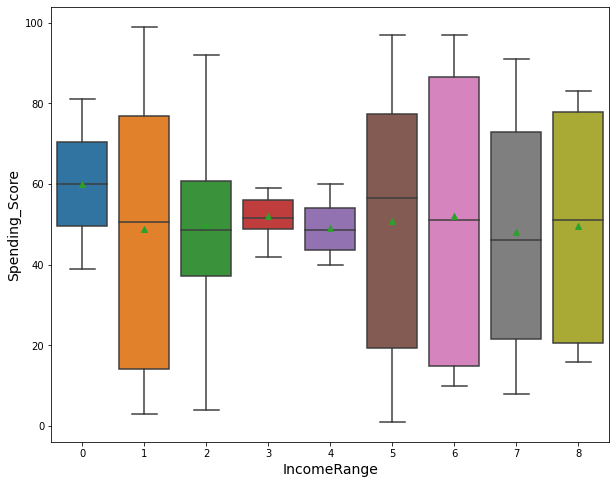

In [802]:
#plt.figure(figsize=(20, 8))
#sn.barplot( df.IncomeRange, df.Spending_Score )
plt.figure(figsize=(10, 8))

sn.boxplot(x='IncomeRange',
            y='Spending_Score',
            data=df,
            showmeans=True)
plt.xlabel("IncomeRange", fontsize=14)
plt.ylabel("Spending_Score", fontsize=14)
plt.show()

In [803]:
df.drop('IncomeRange',inplace=True,axis = 1)

In [804]:
col_names = ['Annual_Income', 'Age', 'Spending_Score']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual_Income,Age,Spending_Score
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [805]:
newdf = scaled_features.join(df.Gender_Female)

Text(0, 0.5, 'Inertia')

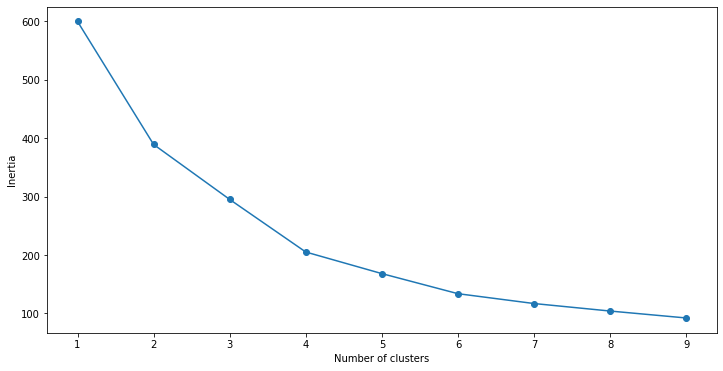

In [806]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

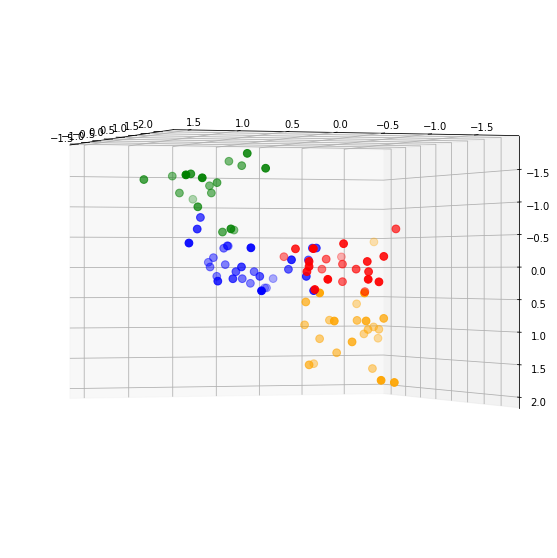

In [807]:

clusters = kmeans.fit_predict(newdf)
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual_Income"][newdf.label == 0], newdf["Spending_Score"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual_Income"][newdf.label == 1], newdf["Spending_Score"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual_Income"][newdf.label == 2], newdf["Spending_Score"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual_Income"][newdf.label == 3], newdf["Spending_Score"][newdf.label == 3], c='orange', s=60)

ax.view_init(-180, 200)
plt.show()

In [808]:
print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.5634119195684624


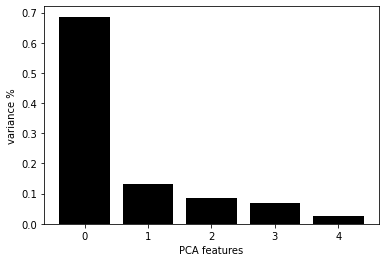

In [809]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

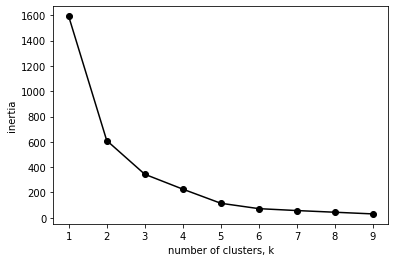

In [810]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [811]:
PCA_components.iloc[:,:2]

,0,1
0,-0.904381,-0.976662
1,-0.796393,-2.003664
2,0.969565,0.046575
3,-0.812074,-1.834154
4,1.027805,-0.306192
...,...,...
195,3.723065,-0.441027
196,2.599402,1.404023
197,3.761081,-0.379491
198,2.692309,1.124100


In [812]:
model = KMeans(n_clusters=5)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.6810292631824015


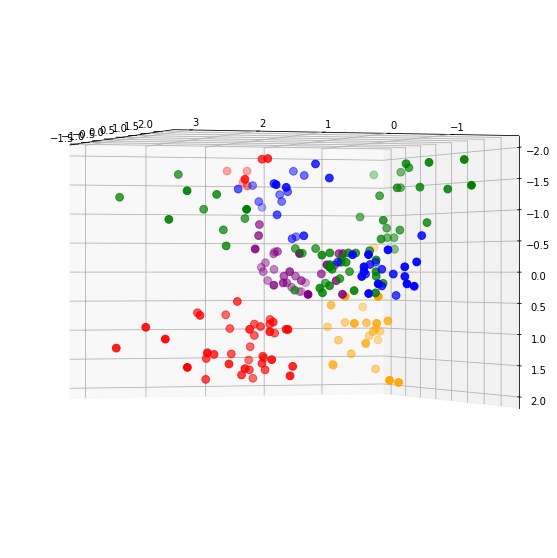

In [813]:
model = KMeans(n_clusters=5)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual_Income"][newdf.label == 0], newdf["Spending_Score"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual_Income"][newdf.label == 1], newdf["Spending_Score"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual_Income"][newdf.label == 2], newdf["Spending_Score"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual_Income"][newdf.label == 3], newdf["Spending_Score"][newdf.label == 3], c='orange', s=60)
ax.scatter(newdf.Age[newdf.label == 4], newdf["Annual_Income"][newdf.label == 4], newdf["Spending_Score"][newdf.label == 4], c='purple', s=60)

ax.view_init(-180, 200)
plt.show()

In [814]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred

frame.rename(columns = {'Spending Score (1-100)':'Spending_Score'}, inplace = True)
frame.rename(columns = {'Annual Income (k$)':'Annual_Income'}, inplace = True)
frame.head()

,Gender,Age,Annual_Income,Spending_Score,cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [815]:
dept_count = frame.groupby(['cluster','Gender']).size()
dept_count_percent = dept_count.groupby('cluster').apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['cluster', 'Gender', 'percent']

In [816]:
dept_count_percent

,cluster,Gender,percent
0,0,Female,0.375000
1,0,Male,0.625000
2,1,Female,0.456522
3,1,Male,0.543478
4,2,Female,0.711864
5,2,Male,0.288136
6,3,Female,0.583333
7,3,Male,0.416667
8,4,Female,0.645161
9,4,Male,0.354839


c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


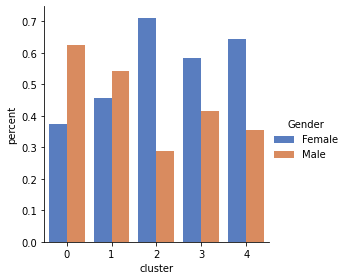

In [817]:
sn.factorplot(y="percent",
            x = 'cluster',
            hue="Gender",
            data = dept_count_percent,
            size=4,
            kind="bar",
            palette="muted")

c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Age'>

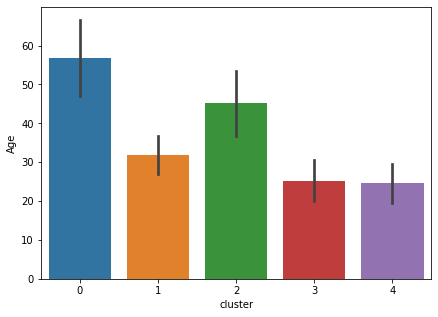

In [818]:
plt.figure(figsize=(7,5))
sn.barplot( frame.cluster, frame.Age,ci='sd')

c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Annual_Income'>

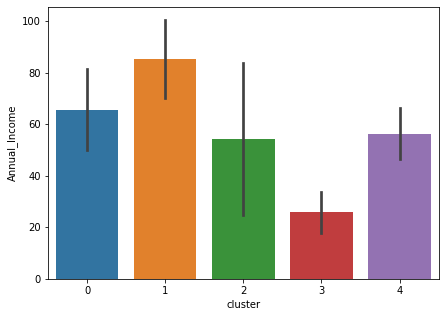

In [819]:
plt.figure(figsize=(7,5))
sn.barplot( frame.cluster, frame.Annual_Income ,ci='sd')


c:\progettiPython\PlagiarismDetection\Plagiarism\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Spending_Score'>

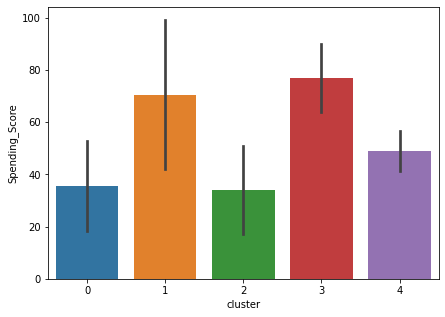

In [820]:
plt.figure(figsize=(7,5))
sn.barplot( frame.cluster, frame.Spending_Score ,ci='sd')